In [4]:
import pandas as pd
import numpy as np

#### Importing City and Geospacial Data

In [8]:
# Import the data from Wikipedia
data = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M",header=0)[0]

# Only select records where Borough is assigned
df = data[data['Borough'] != "Not assigned"]

# Corrects unassigned Neighbourhood to be the value of the Borough
df = df.assign(Neighbourhood2 = df['Neighborhood'])
df['Neighbourhood2'] = np.where(df.Neighborhood == "Not assigned",df.Borough,df.Neighborhood)

# Format
df1 = df.drop("Neighborhood", axis = 1).rename(columns={"Postcode":"PostalCode", "Neighbourhood2":"Neighbourhood"})

# Create lists of Neighbourhoods, grouped by Postal Code and Borough
final = df1.drop_duplicates()\
        .groupby(['PostalCode', 'Borough'])['Neighbourhood'].agg(','.join).reset_index()

result = pd.DataFrame(final)

# Importing Geospacial data
latlong = pd.read_csv("http://cocl.us/Geospatial_data").rename(columns = {"Postal Code":"PostalCode"})

# Join with the Neighbourhood data
result2 = result.merge(latlong, on="PostalCode", how="left")
display(result2)


,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


#### Importing Foursquare Data

In [9]:
CLIENT_ID = 'X30C2R1FRUYZLPPVL0FRX3Z0TX3HV0PC0SOFRC1DLPETVVWJ' # your Foursquare ID
CLIENT_SECRET = 'MGGJMZ33DBTICBIYDF4J01YPLJAVNWZG545VEEE0AXIIHSFD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: X30C2R1FRUYZLPPVL0FRX3Z0TX3HV0PC0SOFRC1DLPETVVWJ
CLIENT_SECRET:MGGJMZ33DBTICBIYDF4J01YPLJAVNWZG545VEEE0AXIIHSFD


In [10]:
# Create table lookup table for Food Venues and corresponding types
foursquare_id = ["503288ae91d4c4b30a586d67",
"4bf58dd8d48988d1c8941735",
"4bf58dd8d48988d10a941735",
"4bf58dd8d48988d14e941735",
"4bf58dd8d48988d157941735",
"4bf58dd8d48988d142941735",
"56aa371be4b08b9a8d573568",
"52e81612bcbc57f1066b7a03",
"4bf58dd8d48988d145941735",
"52af3a7c3cf9994f4e043bed",
"58daa1558bbb0b01f18ec1d3",
"4bf58dd8d48988d1f5931735",
"52af3a9f3cf9994f4e043bef",
"52af3aaa3cf9994f4e043bf0",
"52af3ac83cf9994f4e043bf3",
"52af3afc3cf9994f4e043bf8",
"52af3b463cf9994f4e043bfe",
"52af3b593cf9994f4e043c00",
"52af3b773cf9994f4e043c03",
"52af3b813cf9994f4e043c04",
"52af3b913cf9994f4e043c06",
"4eb1bd1c3b7b55596b4a748f",
"52e81612bcbc57f1066b79fb",
"52af0bd33cf9994f4e043bdd",
"4deefc054765f83613cdba6f",
"4bf58dd8d48988d111941735",
"55a59bace4b013909087cb30",
"55a59bace4b013909087cb24",
"55a59bace4b013909087cb15",
"55a59bace4b013909087cb27",
"4bf58dd8d48988d1d2941735",
"55a59bace4b013909087cb2a",
"4bf58dd8d48988d113941735",
"4bf58dd8d48988d156941735",
"4eb1d5724b900d56c88a45fe",
"4bf58dd8d48988d1d1941735",
"56aa371be4b08b9a8d57350e",
"4bf58dd8d48988d149941735",
"52af39fb3cf9994f4e043be9",
"4bf58dd8d48988d14a941735",
"4bf58dd8d48988d169941735",
"52e81612bcbc57f1066b7a01",
"52e81612bcbc57f1066b7a02",
"4bf58dd8d48988d17a941735",
"4bf58dd8d48988d144941735",
"4bf58dd8d48988d154941735",
"5293a7d53cf9994f4e043a45",
"52f2ae52bcbc57f1066b8b81",
"4bf58dd8d48988d108941735",
"5744ccdfe4b0c0459246b4d0",
"4bf58dd8d48988d109941735",
"58daa1558bbb0b01f18ec1ee",
"56aa371be4b08b9a8d5734f3",
"52960bac3cf9994f4e043ac4",
"52e81612bcbc57f1066b7a05",
"4bf58dd8d48988d10c941735",
"57558b36e4b065ecebd306b0",
"4bf58dd8d48988d10d941735",
"4bf58dd8d48988d10e941735",
"52e81612bcbc57f1066b79f3",
"52e81612bcbc57f1066b79ff",
"52e81612bcbc57f1066b79fe",
"5bae9231bedf3950379f89d4",
"52e81612bcbc57f1066b79fa",
"4bf58dd8d48988d10f941735",
"54135bf5e4b08f3d2429dfe2",
"54135bf5e4b08f3d2429dfdf",
"54135bf5e4b08f3d2429dfde",
"4bf58dd8d48988d110941735",
"52e81612bcbc57f1066b79fd",
"52e81612bcbc57f1066b79fc",
"4bf58dd8d48988d1be941735",
"4bf58dd8d48988d152941735",
"52939a8c3cf9994f4e043a35",
"5745c7ac498e5d0483112fdb",
"4bf58dd8d48988d1cd941735",
"4bf58dd8d48988d107941735",
"4bf58dd8d48988d16b941735",
"58daa1558bbb0b01f18ec1f4",
"4eb1bfa43b7b52c0e1adc2e8",
"56aa371be4b08b9a8d573558",
"4bf58dd8d48988d1c0941735",
"4bf58dd8d48988d1c3941735",
"4bf58dd8d48988d1c1941735",
"4bf58dd8d48988d153941735",
"4bf58dd8d48988d151941735",
"56aa371ae4b08b9a8d5734ba",
"4bf58dd8d48988d115941735",
"5bae9231bedf3950379f89e1",
"5bae9231bedf3950379f89e7",
"56aa371be4b08b9a8d573529",
"5744ccdfe4b0c0459246b4ca",
"58daa1558bbb0b01f18ec1cd",
"52e81612bcbc57f1066b79f7",
"5bae9231bedf3950379f89e4",
"5bae9231bedf3950379f89da",
"5bae9231bedf3950379f89ea",
"52e81612bcbc57f1066b79f8",
"52e81612bcbc57f1066b7a04",
"4def73e84765ae376e57713a",
"5293a7563cf9994f4e043a44",
"4bf58dd8d48988d1c6941735",
"5744ccdde4b0c0459246b4a3",
"56aa371be4b08b9a8d57355a",
"4bf58dd8d48988d14f941735",
"4bf58dd8d48988d150941735",
"4bf58dd8d48988d14d941735",
"4bf58dd8d48988d1db931735",
"5413605de4b0ae91d18581a9",
"4bf58dd8d48988d158941735",
"4f04af1f2fb6e1c99f3db0bb",
"5283c7b4e4b094cb91ec88d8",
"52e928d0bcbc57f1066b7e96"]

cuisine = ["Afghan",
"African",
"Ethiopian",
"American",
"American",
"Asian",
"Burmese",
"Cambodian",
"Chinese",
"Chinese",
"Chinese",
"Chinese",
"Chinese",
"Chinese",
"Hakka",
"Chinese",
"Chinese",
"Chinese",
"Chinese",
"Taiwanese ",
"Chinese",
"Filipino",
"Himalayan",
"Hotpot",
"Indonesian",
"Japanese",
"Japanese",
"Japanese",
"Japanese",
"Japanese",
"Japanese",
"Japanese",
"Korean",
"Asian",
"Asian",
"Asian",
"Asian",
"Thai",
"Asian",
"Vietnamese",
"Australian",
"Austrian",
"Belgian",
"Cajun",
"Carribean",
"Cuban",
"Caucasian",
"Czech",
"Chinese",
"Dutch",
"Eastern European",
"Bosnian",
"Bulgarian",
"Romanian",
"English",
"French",
"French",
"German",
"Greek",
"Greek",
"Halal",
"Hawaiian",
"Hawaiian",
"Hungarian",
"Indian",
"Indian",
"Hakka",
"Indian",
"Italian",
"Jewish",
"Kosher",
"Latin America",
"Latin America",
"Latin America",
"Latin America",
"Latin America",
"Argentinian",
"Brazilian",
"Colombian",
"Peruvian",
"Venezuelan",
"Mediterranean ",
"Mediterranean ",
"Mexican",
"Mexican",
"Mexican",
"Mexican",
"Middle Eastern",
"Egyptian",
"Iraqui",
"Israeli",
"Kurdish",
"Lebanese",
"Persian",
"Shawarma",
"Syrian",
"Yemeni",
"Pakistani",
"Polish",
"Portugese",
"Russian",
"Scandinavian",
"Scottish",
"Slovak",
"Southern ",
"Spanish",
"Spanish",
"Spanish",
"Sri Lankan",
"Swiss",
"Turkish",
"Turkish",
"Ukranian"]

food_id = pd.DataFrame(np.column_stack([foursquare_id,cuisine]), columns = ["Venue Category ID","Cuisine"])

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 100):
    
    import requests 
    import json

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
                        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['id'],
            v['venue']['categories'][0]['name']
            ) for v in results])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue ID',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category ID',
                  'Venue Category'
                            ]
    
    food_venues = pd.merge(nearby_venues, food_id, how='inner', on=['Venue Category ID'])

    return(food_venues)

In [12]:
toronto_venues = getNearbyVenues(names=result2['Neighbourhood'],
                                   latitudes=result2['Latitude'],
                                   longitudes=result2['Longitude']
                                  )

Rouge,Malvern
Highland Creek,Rouge Hill,Port Union
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park,Ionview,Kennedy Park
Clairlea,Golden Mile,Oakridge
Cliffcrest,Cliffside,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Scarborough Town Centre,Wexford Heights
Maryvale,Wexford
Agincourt
Clarks Corners,Sullivan,Tam O'Shanter
Agincourt North,L'Amoreaux East,Milliken,Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
Silver Hills,York Mills
Newtonbrook,Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park,Don Mills South
Bathurst Manor,Downsview North,Wilson Heights
Northwood Park,York University
CFB Toronto,Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens,Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West,Riverdale
The Beaches West,Indi

In [112]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Cuisine']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()

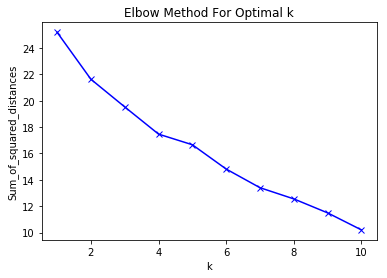

In [138]:
#Determine best K using Elbow Method - Choose K = 5
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [139]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
toronto_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = result2.join(toronto_grouped.set_index('Neighbourhood'), on='Neighbourhood', how = "inner")

In [188]:
map_toronto = folium.Map(location=[43.653963, -79.387207], zoom_start=11)

# add markers to map
for lat, lng, label in zip(result2['Latitude'], result2['Longitude'], result2['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [140]:
# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[43.653963, -79.387207], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analysis

In [156]:
toronto_merged2 = toronto_venues.join(toronto_grouped.set_index('Neighbourhood'), on='Neighbourhood', how = "inner").join(result2.set_index('Neighbourhood'), on="Neighbourhood", how = "inner")

In [190]:
toronto_merged2["Neighbourhood"].nunique()

60

#### Cluster 1

In [160]:
cluster0 = toronto_merged2[toronto_merged2["Cluster Labels"] == 0]
pd.crosstab(cluster0["Borough"],cluster0["Cuisine"])

Cuisine,Afghan,American,Asian,Carribean,Chinese,Ethiopian,Indian,Indonesian,Italian,Japanese,Mediterranean,Mexican,Middle Eastern,Thai,Vietnamese
Borough,,,,,,,,,,,,,,,
Central Toronto,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Downtown Toronto,1,1,0,1,1,1,1,0,1,10,2,2,0,1,1
East York,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
North York,0,0,1,1,2,0,0,1,0,11,0,0,2,0,1


In [178]:
# More granular at Neighbourhood level
pd.crosstab(cluster0["Borough"] + " | " + cluster0["Neighbourhood"], cluster0["Cuisine"])

Cuisine,Afghan,American,Asian,Carribean,Chinese,Ethiopian,Indian,Indonesian,Italian,Japanese,Mediterranean,Mexican,Middle Eastern,Thai,Vietnamese
row_0,,,,,,,,,,,,,,,
"Central Toronto | Forest Hill North,Forest Hill West",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Downtown Toronto | Church and Wellesley,1,1,0,1,1,1,1,0,1,10,2,2,0,1,1
East York | Leaside,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
"North York | Bathurst Manor,Downsview North,Wilson Heights",0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
North York | Bayview Village,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
North York | Don Mills North,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
North York | Glencairn,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
North York | Willowdale South,0,0,0,0,0,0,0,1,0,7,0,0,1,0,1


In [193]:
# Japanese Restaurant Data
cluster0[cluster0["Cuisine"]=="Japanese"]

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category ID,Venue Category,Cuisine,...,Portugese,Southern,Taiwanese,Thai,Turkish,Vietnamese,PostalCode,Borough,Latitude,Longitude
300,Leaside,43.709060,-79.363452,Kintako Japanese Restaurant,530feb6b498e4958420dc8de,43.711597,-79.363962,4bf58dd8d48988d1d2941735,Sushi Restaurant,Japanese,...,0.0,0.0,0.0,0.000000,0.0,0.000000,M4G,East York,43.709060,-79.363452
211,Church and Wellesley,43.665860,-79.383160,Kawa Sushi,4c193c77838020a1e768e561,43.663894,-79.380210,4bf58dd8d48988d111941735,Japanese Restaurant,Japanese,...,0.0,0.0,0.0,0.043478,0.0,0.043478,M4Y,Downtown Toronto,43.665860,-79.383160
212,Church and Wellesley,43.665860,-79.383160,Onnki Donburi,59c54d4f2d2fd97564d4cfc8,43.669757,-79.384574,4bf58dd8d48988d111941735,Japanese Restaurant,Japanese,...,0.0,0.0,0.0,0.043478,0.0,0.043478,M4Y,Downtown Toronto,43.665860,-79.383160
213,Church and Wellesley,43.665860,-79.383160,Okonomi House お好みハウス,4adf45d4f964a520fb7821e3,43.668448,-79.386884,4bf58dd8d48988d111941735,Japanese Restaurant,Japanese,...,0.0,0.0,0.0,0.043478,0.0,0.043478,M4Y,Downtown Toronto,43.665860,-79.383160
214,Church and Wellesley,43.665860,-79.383160,Kokoni Izakaya,4c531b60a724e21e029e3af4,43.664181,-79.380258,4bf58dd8d48988d111941735,Japanese Restaurant,Japanese,...,0.0,0.0,0.0,0.043478,0.0,0.043478,M4Y,Downtown Toronto,43.665860,-79.383160
289,Church and Wellesley,43.665860,-79.383160,Sansotei Ramen 三草亭,534c20fa498ee7bc010834ce,43.666735,-79.385353,55a59bace4b013909087cb24,Ramen Restaurant,Japanese,...,0.0,0.0,0.0,0.043478,0.0,0.043478,M4Y,Downtown Toronto,43.665860,-79.383160
305,Church and Wellesley,43.665860,-79.383160,Tokyo Sushi,4afca145f964a5208e2422e3,43.665885,-79.386977,4bf58dd8d48988d1d2941735,Sushi Restaurant,Japanese,...,0.0,0.0,0.0,0.043478,0.0,0.043478,M4Y,Downtown Toronto,43.665860,-79.383160
306,Church and Wellesley,43.665860,-79.383160,Wow! Sushi,4e52a293483bf6d4ed3a4665,43.668514,-79.386686,4bf58dd8d48988d1d2941735,Sushi Restaurant,Japanese,...,0.0,0.0,0.0,0.043478,0.0,0.043478,M4Y,Downtown Toronto,43.665860,-79.383160
307,Church and Wellesley,43.665860,-79.383160,Sushi Box,4ecd63d96da162f1bb0f11c4,43.662960,-79.386580,4bf58dd8d48988d1d2941735,Sushi Restaurant,Japanese,...,0.0,0.0,0.0,0.043478,0.0,0.043478,M4Y,Downtown Toronto,43.665860,-79.383160
308,Church and Wellesley,43.665860,-79.383160,Rolltation,5a1f102a646e38375b20d8fd,43.669388,-79.386566,4bf58dd8d48988d1d2941735,Sushi Restaurant,Japanese,...,0.0,0.0,0.0,0.043478,0.0,0.043478,M4Y,Downtown Toronto,43.665860,-79.383160


#### Cluster 2

In [179]:
cluster1 = toronto_merged2[toronto_merged2["Cluster Labels"] == 1]
pd.crosstab(cluster1["Borough"],cluster1["Cuisine"])

Cuisine,American,Asian,Belgian,Carribean,Chinese,Filipino,Hotpot,Indian,Italian,Japanese,Mexican,Middle Eastern,Turkish,Vietnamese
Borough,,,,,,,,,,,,,,
Central Toronto,1,0,0,0,0,0,0,1,0,0,0,0,0,0
Downtown Toronto,0,1,1,2,10,1,1,0,1,2,5,0,1,5
East York,0,0,0,0,0,0,0,2,0,0,0,0,0,0
Etobicoke,0,0,0,0,1,0,0,0,0,0,0,1,0,0
North York,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Scarborough,0,0,0,0,3,0,0,2,0,0,0,0,0,1


In [180]:
# More granular at Neighbourhood level
pd.crosstab(cluster1["Borough"] + " | " + cluster1["Neighbourhood"], cluster1["Cuisine"])

Cuisine,American,Asian,Belgian,Carribean,Chinese,Filipino,Hotpot,Indian,Italian,Japanese,Mexican,Middle Eastern,Turkish,Vietnamese
row_0,,,,,,,,,,,,,,
"Central Toronto | The Annex,North Midtown,Yorkville",1,0,0,0,0,0,0,1,0,0,0,0,0,0
"Downtown Toronto | Chinatown,Grange Park,Kensington Market",0,1,1,2,10,1,1,0,1,2,5,0,1,5
East York | Thorncliffe Park,0,0,0,0,0,0,0,2,0,0,0,0,0,0
Etobicoke | Westmount,0,0,0,0,1,0,0,0,0,0,0,1,0,0
"North York | Lawrence Heights,Lawrence Manor",0,0,0,0,0,0,0,0,0,0,0,0,0,1
"Scarborough | Dorset Park,Scarborough Town Centre,Wexford Heights",0,0,0,0,1,0,0,2,0,0,0,0,0,1
Scarborough | L'Amoreaux West,0,0,0,0,2,0,0,0,0,0,0,0,0,0


In [194]:
# Chinese Restaurant Data
cluster1[cluster1["Cuisine"]=="Chinese"]

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category ID,Venue Category,Cuisine,...,Portugese,Southern,Taiwanese,Thai,Turkish,Vietnamese,PostalCode,Borough,Latitude,Longitude
101,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,Swatow Restaurant 汕頭小食家,4ae29812f964a520288f21e3,43.653866,-79.398334,4bf58dd8d48988d145941735,Chinese Restaurant,Chinese,...,0.0,0.0,0.0,0.0,0.033333,0.166667,M5T,Downtown Toronto,43.653206,-79.400049
102,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,New Sky Restaurant 小沙田食家,4b074bb1f964a52077fb22e3,43.655337,-79.398897,4bf58dd8d48988d145941735,Chinese Restaurant,Chinese,...,0.0,0.0,0.0,0.0,0.033333,0.166667,M5T,Downtown Toronto,43.653206,-79.400049
103,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,Rosewood Chinese Cuisine,4fd3ea3ee4b0191b9c2b1aff,43.653171,-79.396710,4bf58dd8d48988d145941735,Chinese Restaurant,Chinese,...,0.0,0.0,0.0,0.0,0.033333,0.166667,M5T,Downtown Toronto,43.653206,-79.400049
104,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,House of Gourmet 滿庭芳,4ada4857f964a520df2021e3,43.653273,-79.397230,4bf58dd8d48988d145941735,Chinese Restaurant,Chinese,...,0.0,0.0,0.0,0.0,0.033333,0.166667,M5T,Downtown Toronto,43.653206,-79.400049
105,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,Asian Legend 味香村,4adb5472f964a520fc2521e3,43.653603,-79.395047,4bf58dd8d48988d145941735,Chinese Restaurant,Chinese,...,0.0,0.0,0.0,0.0,0.033333,0.166667,M5T,Downtown Toronto,43.653206,-79.400049
325,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,Dim Sum King Seafood Restaurant,4ddbe8697d8b771c0b09b885,43.653503,-79.395405,4bf58dd8d48988d1f5931735,Dim Sum Restaurant,Chinese,...,0.0,0.0,0.0,0.0,0.033333,0.166667,M5T,Downtown Toronto,43.653206,-79.400049
362,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,Dumpling House,4b119787f964a520188023e3,43.653860,-79.398558,4bf58dd8d48988d108941735,Dumpling Restaurant,Chinese,...,0.0,0.0,0.0,0.0,0.033333,0.166667,M5T,Downtown Toronto,43.653206,-79.400049
363,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,Juicy Dumpling,5ba1a63c5d891b002c262874,43.652722,-79.398498,4bf58dd8d48988d108941735,Dumpling Restaurant,Chinese,...,0.0,0.0,0.0,0.0,0.033333,0.166667,M5T,Downtown Toronto,43.653206,-79.400049
364,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,Yummy Yummy Dumpling 口口香餃子館,4e78d6d5091a2a74e0523d83,43.653699,-79.396259,4bf58dd8d48988d108941735,Dumpling Restaurant,Chinese,...,0.0,0.0,0.0,0.0,0.033333,0.166667,M5T,Downtown Toronto,43.653206,-79.400049
365,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,Mother's Dumplings,4b7716a9f964a520297c2ee3,43.657105,-79.399552,4bf58dd8d48988d108941735,Dumpling Restaurant,Chinese,...,0.0,0.0,0.0,0.0,0.033333,0.166667,M5T,Downtown Toronto,43.653206,-79.400049


#### Cluster 3

In [181]:
cluster2 = toronto_merged2[toronto_merged2["Cluster Labels"] == 2]
pd.crosstab(cluster2["Borough"],cluster2["Cuisine"])

Cuisine,Chinese,Mexican
Borough,,
Central Toronto,1,1
East Toronto,0,1
Etobicoke,0,2
Scarborough,0,1


In [183]:
# More granular at Neighbourhood level
pd.crosstab(cluster2["Borough"] + " | " + cluster2["Neighbourhood"], cluster2["Cuisine"])

Cuisine,Chinese,Mexican
row_0,,
Central Toronto | North Toronto West,1,1
East Toronto | Business Reply Mail Processing Centre 969 Eastern,0,1
"Etobicoke | Humber Bay Shores,Mimico South,New Toronto",0,1
"Etobicoke | Kingsway Park South West,Mimico NW,The Queensway West,Royal York South West,South of Bloor",0,1
"Scarborough | Guildwood,Morningside,West Hill",0,1


In [195]:
# Mexican Restaurant Data
cluster2[cluster2["Cuisine"]=="Mexican"]

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category ID,Venue Category,Cuisine,...,Portugese,Southern,Taiwanese,Thai,Turkish,Vietnamese,PostalCode,Borough,Latitude,Longitude
0,"Guildwood,Morningside,West Hill",43.763573,-79.188711,Big Bite Burrito,5411f741498e9ebd5e35d8bd,43.766299,-79.190720,4bf58dd8d48988d1c1941735,Mexican Restaurant,Mexican,...,0.0,0.0,0.0,0.0,0.0,0.0,M1E,Scarborough,43.763573,-79.188711
2,North Toronto West,43.715383,-79.405678,Tio's Urban Mexican,5738efd3498ef5d2444c477e,43.714630,-79.400000,4bf58dd8d48988d1c1941735,Mexican Restaurant,Mexican,...,0.0,0.0,0.0,0.0,0.0,0.0,M4R,Central Toronto,43.715383,-79.405678
14,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Hex-Mex,512cf6bde4b07767b2c343bf,43.601261,-79.502284,4bf58dd8d48988d1c1941735,Mexican Restaurant,Mexican,...,0.0,0.0,0.0,0.0,0.0,0.0,M8V,Etobicoke,43.605647,-79.501321
267,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,Chino Locos,4ad8f034f964a520301621e3,43.664653,-79.325584,4bf58dd8d48988d153941735,Burrito Place,Mexican,...,0.0,0.0,0.0,0.0,0.0,0.0,M7Y,East Toronto,43.662744,-79.321558
268,"Kingsway Park South West,Mimico NW,The Queensw...",43.628841,-79.520999,Burrito Boyz,4fb27945e4b0d2c83d3113cd,43.626657,-79.526349,4bf58dd8d48988d153941735,Burrito Place,Mexican,...,0.0,0.0,0.0,0.0,0.0,0.0,M8Z,Etobicoke,43.628841,-79.520999


#### Cluster 4

In [191]:
cluster3 = toronto_merged2[toronto_merged2["Cluster Labels"] == 3]
pd.crosstab(cluster3["Cuisine"], cluster3["Borough"])

Borough,Central Toronto,Downtown Toronto,East Toronto,Mississauga,North York,Queen's Park,Scarborough,West Toronto
Cuisine,,,,,,,,
American,1,20,3,1,2,0,1,2
Asian,1,14,0,0,3,0,1,4
Brazilian,0,2,0,0,0,0,0,0
Cajun,0,0,0,0,0,0,0,1
Carribean,0,1,1,0,1,0,1,0
Chinese,0,8,0,0,3,1,1,0
Colombian,0,1,0,0,0,0,0,0
Cuban,0,0,0,0,0,0,0,2
Eastern European,0,0,0,0,0,0,0,1


In [185]:
# More granular at Neighbourhood level
pd.crosstab(cluster3["Borough"] + " | " + cluster3["Neighbourhood"], cluster3["Cuisine"])

Cuisine,American,Asian,Brazilian,Cajun,Carribean,Chinese,Colombian,Cuban,Eastern European,Ethiopian,...,Korean,Latin America,Mediterranean,Mexican,Middle Eastern,Portugese,Southern,Taiwanese,Thai,Vietnamese
row_0,,,,,,,,,,,,,,,,,,,,,
Central Toronto | Davisville,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"Central Toronto | Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Downtown Toronto | Adelaide,King,Richmond",3,4,1,0,0,0,1,0,0,0,...,0,1,1,1,0,0,0,0,3,0
Downtown Toronto | Berczy Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"Downtown Toronto | Cabbagetown,St. James Town",0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
Downtown Toronto | Central Bay Street,1,0,0,0,0,2,0,0,0,0,...,1,0,0,0,2,1,0,0,1,0
Downtown Toronto | Christie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Downtown Toronto | Commerce Court,Victoria Hotel",4,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
"Downtown Toronto | Design Exchange,Toronto Dominion Centre",4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [197]:
# Italian Restaurant Data
cluster3[cluster3["Cuisine"]=="Italian"]

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category ID,Venue Category,Cuisine,...,Portugese,Southern,Taiwanese,Thai,Turkish,Vietnamese,PostalCode,Borough,Latitude,Longitude
153,Harbourfront,43.654260,-79.360636,Archeo,4ac3e6cef964a520629d20e3,43.650667,-79.359431,4bf58dd8d48988d110941735,Italian Restaurant,Italian,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,M5A,Downtown Toronto,43.654260,-79.360636
154,"Ryerson,Garden District",43.657162,-79.378937,Trattoria Mercatto,4d306dd82748b60c62b6dba0,43.654453,-79.380974,4bf58dd8d48988d110941735,Italian Restaurant,Italian,...,0.000000,0.000000,0.000000,0.058824,0.0,0.058824,M5B,Downtown Toronto,43.657162,-79.378937
155,"Ryerson,Garden District",43.657162,-79.378937,Scaddabush Italian Kitchen & Bar,52f6816f11d24a43115dc834,43.658920,-79.382891,4bf58dd8d48988d110941735,Italian Restaurant,Italian,...,0.000000,0.000000,0.000000,0.058824,0.0,0.058824,M5B,Downtown Toronto,43.657162,-79.378937
186,"Little Portugal,Trinity",43.647927,-79.419750,Ufficio,56aabee1498ebfd21c627b88,43.649439,-79.423014,4bf58dd8d48988d110941735,Italian Restaurant,Italian,...,0.000000,0.066667,0.000000,0.000000,0.0,0.133333,M6J,West Toronto,43.647927,-79.419750
188,"High Park,The Junction South",43.661608,-79.464763,nodo,540f2951498e7516839a7126,43.665303,-79.465621,4bf58dd8d48988d110941735,Italian Restaurant,Italian,...,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,M6P,West Toronto,43.661608,-79.464763
192,Queen's Park,43.662301,-79.389494,Mercatto,4a8355bff964a520d3fa1fe3,43.660391,-79.387664,4bf58dd8d48988d110941735,Italian Restaurant,Italian,...,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,M7A,Queen's Park,43.662301,-79.389494
192,Queen's Park,43.662301,-79.389494,Mercatto,4a8355bff964a520d3fa1fe3,43.660391,-79.387664,4bf58dd8d48988d110941735,Italian Restaurant,Italian,...,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,M9A,Downtown Toronto,43.667856,-79.532242
160,Central Bay Street,43.657952,-79.387383,Mercatto,4a8355bff964a520d3fa1fe3,43.660391,-79.387664,4bf58dd8d48988d110941735,Italian Restaurant,Italian,...,0.052632,0.000000,0.000000,0.052632,0.0,0.000000,M5G,Downtown Toronto,43.657952,-79.387383
161,Central Bay Street,43.657952,-79.387383,Scaddabush Italian Kitchen & Bar,52f6816f11d24a43115dc834,43.658920,-79.382891,4bf58dd8d48988d110941735,Italian Restaurant,Italian,...,0.052632,0.000000,0.000000,0.052632,0.0,0.000000,M5G,Downtown Toronto,43.657952,-79.387383
162,Central Bay Street,43.657952,-79.387383,Sambuca Grill,4b758acdf964a520e0122ee3,43.656110,-79.392946,4bf58dd8d48988d110941735,Italian Restaurant,Italian,...,0.052632,0.000000,0.000000,0.052632,0.0,0.000000,M5G,Downtown Toronto,43.657952,-79.387383


In [199]:
# Japanese Restaurant Data
cluster3[cluster3["Cuisine"]=="Japanese"]

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category ID,Venue Category,Cuisine,...,Portugese,Southern,Taiwanese,Thai,Turkish,Vietnamese,PostalCode,Borough,Latitude,Longitude
215,"Ryerson,Garden District",43.657162,-79.378937,Kinka Izakaya Original,4b2bd898f964a52042bc24e3,43.660596,-79.378891,4bf58dd8d48988d111941735,Japanese Restaurant,Japanese,...,0.000000,0.0,0.000000,0.058824,0.0,0.058824,M5B,Downtown Toronto,43.657162,-79.378937
290,"Ryerson,Garden District",43.657162,-79.378937,Hokkaido Ramen Santouka らーめん山頭火,509e9ef6e4b0ab175389a6c5,43.656435,-79.377586,55a59bace4b013909087cb24,Ramen Restaurant,Japanese,...,0.000000,0.0,0.000000,0.058824,0.0,0.058824,M5B,Downtown Toronto,43.657162,-79.378937
291,"Ryerson,Garden District",43.657162,-79.378937,Kinton Ramen,560b1653498e1a2dfa4af722,43.660632,-79.378880,55a59bace4b013909087cb24,Ramen Restaurant,Japanese,...,0.000000,0.0,0.000000,0.058824,0.0,0.058824,M5B,Downtown Toronto,43.657162,-79.378937
310,"Ryerson,Garden District",43.657162,-79.378937,Spring Sushi,4fe4a773e4b0ef61f5212ecd,43.656253,-79.380660,4bf58dd8d48988d1d2941735,Sushi Restaurant,Japanese,...,0.000000,0.0,0.000000,0.058824,0.0,0.058824,M5B,Downtown Toronto,43.657162,-79.378937
322,Queen's Park,43.662301,-79.389494,Sushi Box,4ecd63d96da162f1bb0f11c4,43.662960,-79.386580,4bf58dd8d48988d1d2941735,Sushi Restaurant,Japanese,...,0.142857,0.0,0.000000,0.000000,0.0,0.000000,M7A,Queen's Park,43.662301,-79.389494
322,Queen's Park,43.662301,-79.389494,Sushi Box,4ecd63d96da162f1bb0f11c4,43.662960,-79.386580,4bf58dd8d48988d1d2941735,Sushi Restaurant,Japanese,...,0.142857,0.0,0.000000,0.000000,0.0,0.000000,M9A,Downtown Toronto,43.667856,-79.532242
323,Queen's Park,43.662301,-79.389494,Tokyo Sushi,4afca145f964a5208e2422e3,43.665885,-79.386977,4bf58dd8d48988d1d2941735,Sushi Restaurant,Japanese,...,0.142857,0.0,0.000000,0.000000,0.0,0.000000,M7A,Queen's Park,43.662301,-79.389494
323,Queen's Park,43.662301,-79.389494,Tokyo Sushi,4afca145f964a5208e2422e3,43.665885,-79.386977,4bf58dd8d48988d1d2941735,Sushi Restaurant,Japanese,...,0.142857,0.0,0.000000,0.000000,0.0,0.000000,M9A,Downtown Toronto,43.667856,-79.532242
219,Central Bay Street,43.657952,-79.387383,Rolltation,5773f01f498e98371390bdfd,43.654918,-79.387424,4bf58dd8d48988d111941735,Japanese Restaurant,Japanese,...,0.052632,0.0,0.000000,0.052632,0.0,0.000000,M5G,Downtown Toronto,43.657952,-79.387383
220,Central Bay Street,43.657952,-79.387383,Gyubee Japanese Grill,5d782433f6e3190008b1a914,43.655363,-79.384955,4bf58dd8d48988d111941735,Japanese Restaurant,Japanese,...,0.052632,0.0,0.000000,0.052632,0.0,0.000000,M5G,Downtown Toronto,43.657952,-79.387383


#### Cluster 5

In [186]:
cluster4 = toronto_merged2[toronto_merged2["Cluster Labels"] == 4]
pd.crosstab(cluster4["Borough"],cluster4["Cuisine"])

Cuisine,Latin America
Borough,
North York,1
Scarborough,1


In [187]:
# More granular
pd.crosstab(cluster4["Borough"] + " | " + cluster4["Neighbourhood"], cluster4["Cuisine"])

Cuisine,Latin America
row_0,
North York | Humber Summit,1
Scarborough | Agincourt,1


In [200]:
# Latin American Restaurant Data
cluster4[cluster4["Cuisine"]=="Latin America"]

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category ID,Venue Category,Cuisine,...,Portugese,Southern,Taiwanese,Thai,Turkish,Vietnamese,PostalCode,Borough,Latitude,Longitude
135,Agincourt,43.794200,-79.262029,El Pulgarcito,4b50b100f964a520b72d27e3,43.792648,-79.259208,4bf58dd8d48988d1be941735,Latin American Restaurant,Latin America,...,0.0,0.0,0.0,0.0,0.0,0.0,M1S,Scarborough,43.794200,-79.262029
375,Humber Summit,43.756303,-79.565963,The Famous Mama Mia,53d2946f498e67ffa94f5c19,43.758820,-79.570637,52939a8c3cf9994f4e043a35,Empanada Restaurant,Latin America,...,0.0,0.0,0.0,0.0,0.0,0.0,M9L,North York,43.756303,-79.565963
